# Plotting DP1 light curves

[Issue 26](https://github.com/astronomy-commons/lsdb-rubin/issues/26)

Adds a basic light curve plotting method. 

In [1]:
import lsdb
import nested_pandas as npd
from lsdb_rubin import plot_light_curve, plot_filter_colors_rainbow

In [2]:
cat = lsdb.open_catalog("/rubin/lsdb_data/dia_object_collection/").id_search({"diaObjectId":609789561081430049})
row = cat.compute().iloc[0]

## Default behavior

Here's the absolute-vanilla default - 

- uses magnitudes (specifically, `psfMag`)
- no additional legend stuff
- rubin color-blind default colors
- rubin default symbols
- rubin default line styles

All Rubin defaults are outlined here: https://rtn-045.lsst.io/#colorblind-friendly-plots

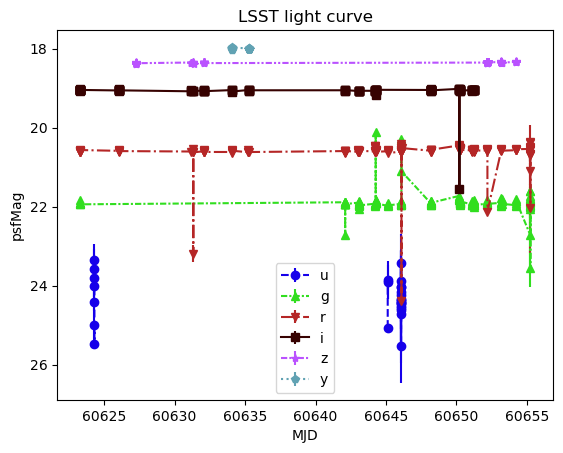

In [3]:
plot_light_curve(row["diaObjectForcedSource"])

## Different magnitude field

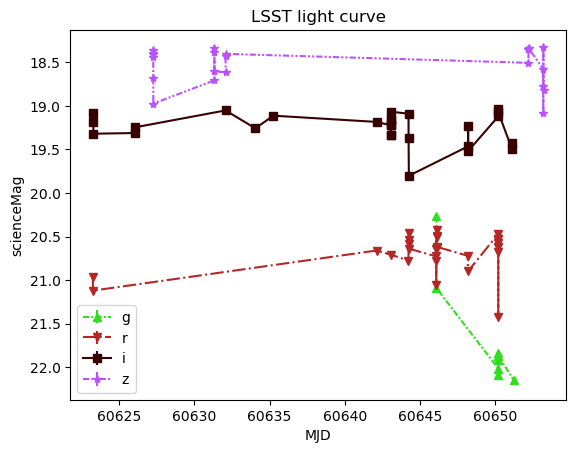

In [4]:
plot_light_curve(row["diaSource"], mag_field="scienceMag")

## Flux field

Note the y axis values, ticks, label!

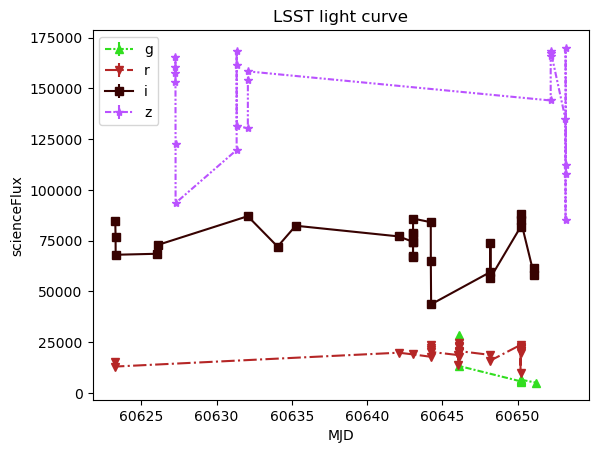

In [5]:
plot_light_curve(row["diaSource"], flux_field="scienceFlux")

## Pretty colors

The rubin defaults are nice for color-blindness, but kind of ugly for typical color vision. So I threw in another pre-defined dictionary of colors - "rainbow". 

You could create whatever band to color map you wanted, shown just after, using an "Ugly Halloween" palette I found on the internet.

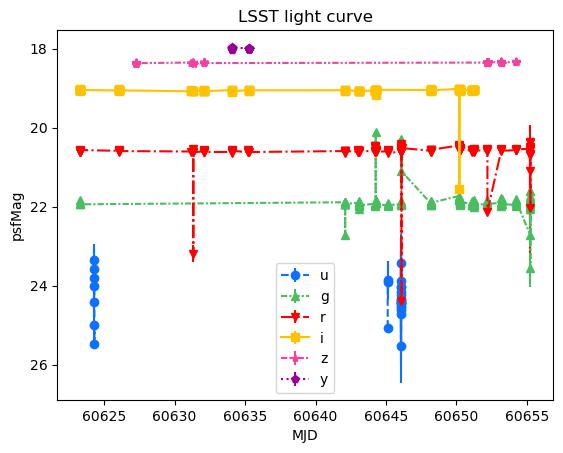

In [6]:
plot_light_curve(row["diaObjectForcedSource"], filter_colors=plot_filter_colors_rainbow)

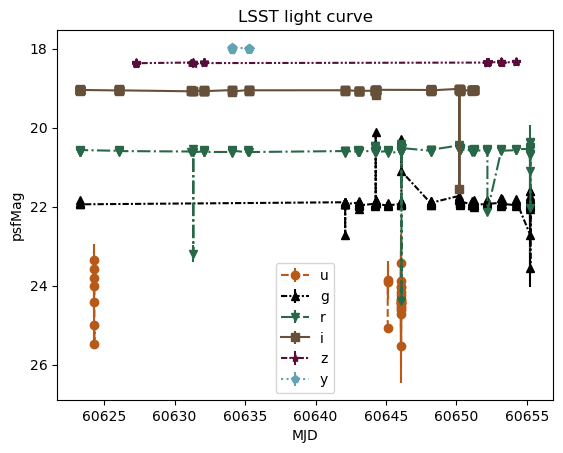

In [7]:
plot_light_curve(row["diaObjectForcedSource"], filter_colors={"u": "#b65919", "g": "#000000", "r": "#286849", "i": "#67503a", "z": "#570e3b", "y": "#61a2b3"})

## Periodic light curves

This isn't really a periodic object, but you can throw in a value for `period`, and check out the x-axis values, tick, and label.

Also doesn't show the connecting lines anymore.

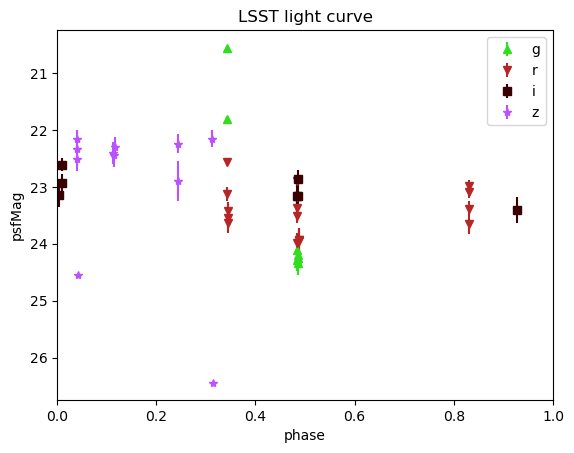

In [8]:
plot_light_curve(row["diaSource"], period=3.6)

## What if not all bands are there?

In fornax dSph, ComCam only looked in three bands. 

So here we're only showing three bands, and those are the only ones in the legend. Hope that's ok.

In [9]:
dfsm = lsdb.open_catalog("/rubin/lsdb_data/dia_object_collection/", search_filter=lsdb.ConeSearch(ra=40.00, dec=-34.45, radius_arcsec=5)).compute()
dfsm

dec         diaObjectId  nDiaSources         ra  \
_healpix_29                                                                 
2531108869513310503 -34.44958  604064129157695462            1  40.001125   

                      radecMjdTai  tract  \
_healpix_29                                
2531108869513310503  60639.271225   4016   

                                                 diaObjectForcedSource  \
_healpix_29                                                              
2531108869513310503  [{band: 'r', coord_dec: -34.44958, coord_ra: 4...   

                                                             diaSource  
_healpix_29                                                             
2531108869513310503  [{band: 'i', centroid_flag: False, coord_dec: ...

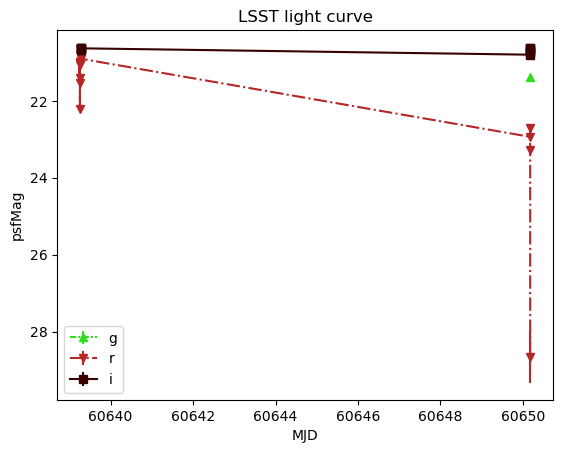

In [10]:
plot_light_curve(dfsm.iloc[0]["diaObjectForcedSource"])